# Numpy, Scipy and Design Matrices for linear regression

Our goal for today is to build several design matrices for the case when we have several variables. Along the way, we'll examine some utility functions built into numpy and scipy.

## Matrices in Numpy

Matrices in `numpy` are 2D arrays, which are wrappers around basic python list-of-lists

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
A_list_of_lists = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

# Turn python list of lists to a numpy 2D array
A = np.array(A_list_of_lists)

In [20]:
# Now we can do numpy operations!
# count how many rows

# count how many columns

[[ 1  4  9]
 [16 25 36]
 [49 64 81]]


In [ ]:
# Square each element

In [21]:
# Add them together


[[ 2  6 12]
 [20 30 42]
 [56 72 90]]


In [25]:
# Sum down columns (axis = 0)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([ 6, 15, 24])

In [26]:
# Sum down rows (axis = 1)

array([ 6, 15, 24])

In [27]:
# Get the element in row 0, column 1

# Get column 0

# Set column 0

# Get the row 2

# Set row 2

Often in this class, we'll store our data in matrices. We'll hold the convention that each **row** corresponds to a data point, and each **column** corresponds to a variable. So if we had data about 1) temperature, 2) pressure, and 3)strength over 5 measurements, we would have a matrix with 5 rows and 3 columns.

One useful thing to do to your data is to normalize variables, so that they are all unitless. You should normalize each variable seperately. Three common normalization techniques are:

1. [0,1] normalization: 
$$X^\prime = \frac{X - \min(X)}{\max(X) - \min(X)}$$
2. [-1, 1] normalization: 
$$X^\prime = 2\frac{X - \min(X)}{\max(X) - \min(X)} - 1$$
3. Z-normalization: 
$$X^\prime = \frac{X - \mu}{\sigma}$$


### Exercise
Write a function that takes in a matrix and performs normalization on each of its columns. It should take in a string called `norm_type`, which should either be `[0,1]`, `[-1,1]` or `Z` to indicate the type of normalization to perform. It should return a matrix with the normalized columns


Call it on a the matrix `A` defined above. Print out the result. Then print out `A` again.

## Design matrices

Recall that a crucial part of linear regression is in deciding which basis functions we would like to use to write 

$$ y = \sum_{j=1}^n \theta_j \phi_j(\mathbf x). $$

In class, we looked at some common basis functions for the case when the input $\mathbf x$ was just a scalar quantity, $\mathbf x = x$. Examples include the monomial (or power series) basis:
$$ \phi_j = x^j,$$
or the Chebyshev polynomials:
$$ \phi_j(x) = T_j(x) = \cos( j \cdot \text{arccos} x)$$
or the Fourier basis (which consists of two sets of functions):
$$ \phi_j(x) = \cos(jx) $$
$$ \psi_j(x) = \sin(jx) $$

To perform the least-squares regression, we had to build the **design matrix** $\Phi$ which is defined as

$$ \Phi_{i,j} = \phi_j(\mathbf x_i),$$

where $\mathbf x_i$ is the input variable(s) corresponding to the $i$-th data point. We saw in class that in the case of the monomial basis, the design matrix had a special name called the **Vandermonde** matrix, and that `numpy`  had a special function to construct this called `numpy.vander`.

For other bases, we aren't so lucky, and so we have to manually construct our design matrices. For example, let's build a design matrix for the Fourier series:
$$ y = \gamma + \sum_{j=1}^n \alpha_j \cos(jx) + \sum_{j=1}^n \beta_j \sin(jx),$$
Here $\theta = (\gamma, \alpha_1, ..., \alpha_n, \beta_1, ... \beta_n)$

### Exercise: Build the Fourier Design Matrix

In [3]:
# X = data, numbers between -pi and pi
def build_fourier_design_matrix(X, n):
    # We're going to think of the matrix Phi = [1 C S]
    # as a concatenation of 3 parts:
    #   1: the all ones vector 
    #   2: The cosine basis functions
    #   3: The sine basis functions
    
    # Build the cos part:
    
    
    # Build the sin part:
    
    
    # Build the all ones vector:
    
    # concatenate them together with the np.concatenate function
    

SyntaxError: unexpected EOF while parsing (<ipython-input-3-973e367ae356>, line 20)

Now let's test this out on some data. We'll use as our ground truth some function:

$$y = 3 + \cos(x) - \sin(2x) + 0.5\sin(3x)$$


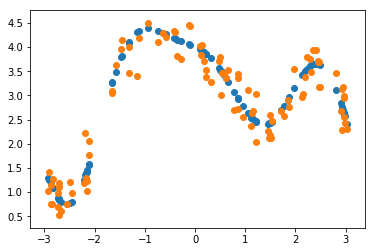

In [14]:
# pick some random x values between -pi to pi. we can use numpy.random.uniform to do this.

# evaluate the ground truth (here we can use numpy.sin and numpy.cos)

# Add noise iid noise N(0, 0.3^2) noise to y

In [ ]:
# now build the design matrix and run least squares.

## Multiple input variables

In many instances, we have several input variables, instead of just 1. In many respects, nothing really changes from the single-variable case. We just have to define basis functions that take in several variables, and return a number.

One common multi-variable family of basis functions are **Radial Basis Functions**. Radial basis functions are really functions of the distance between their inputs and some fixed points in the domain.

For example, if we fix a set of $n$ points $\mathbf z_1, ..., \mathbf z_n$ of the same dimensionality as the input variables $\mathbf x_1, ..., \mathbf x_D$, we can define the so-called **Gaussian Radial Basis Functions**:

$$ \phi_j(\mathbf x) = \exp\left[-\frac{\|\mathbf x - \mathbf z_j\|_2^2}{a^2}\right]$$

where $a$ is a parameter.

### Exercise: Implement the Guassian Radial Basis Function:

In [ ]:
def gauss_rbf(x, z, a=1):

Once we have the gauss_rbf implemented, we can form the corresponding design matrix

### Exercise: Build the Gaussian RBF Design Matrix


In [ ]:
# X is a m x D array of input vectors, each row corresponding to a different data point
# Z is an n x D array of fixed points, each row corresponding to a different fixed point

def build_gaussian_design_matrix(X, Z, a):
    m = X.shape[0]
    D = X.shape[1]
    n = Z.shape[0]
    
    Phi = np.zeros([m, n])
 
    # iterate over all data points

        # Get the i-th data point
        
        # iterate over all basis functions (equiv. all fixed points)

            # Get the j-th fixed point
            
            ## Phi[i,j] = j-th basis function evaluated at the i-th data point

Once we built this, we can try fitting some data. You can load the data file `creep_rupture_tests.txt`. This data file has 31 columns. The `Y = data[:,1]` variable is in column 1. The `X = data[:, 2:31]` variables are in columns 2 to 30.

### Exercise: Use least squares regression to fit the data.
1. Seperate the data into testing (first 1000 points), validation (next 500 points) and testing (remaining points) sets.

2. For n fixed points, use the first $n$ points in the training data.

3. Measure how good the trained model does on the validation testing set.


